# 古いバージョン （いま実行してもエラーになる)

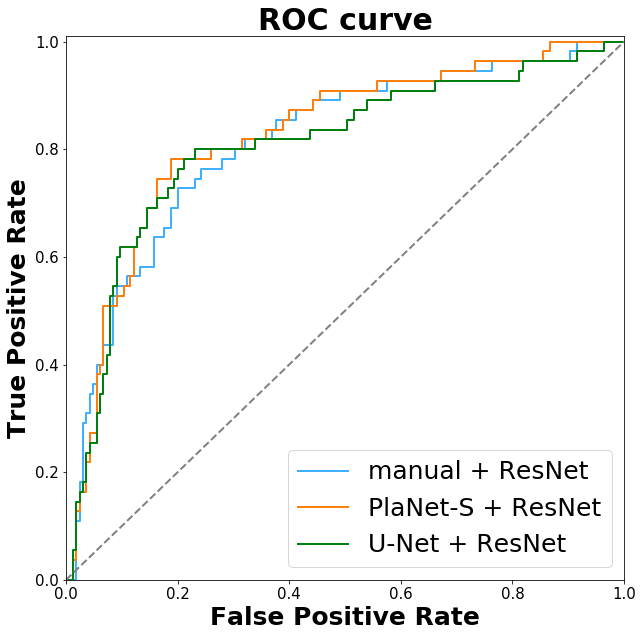

In [60]:
import matplotlib.pyplot as plt
import torch
ROC1 = torch.load("PlaNet/Step8_1_result/ROC")
fpr1 = ROC1[0].cpu()
tpr1 = ROC1[1].cpu()
ROC2 = torch.load("PlaNet/Step8_2_result/ROC")
fpr2 = ROC2[0].cpu()
tpr2 = ROC2[1].cpu()
ROC4 = torch.load("PlaNet/Step8_4_result/ROC")
fpr4 = ROC4[0].cpu()
tpr4 = ROC4[1].cpu()

# ROC curveのプロット
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr1, tpr1, color=[64/256, 177/256,255/256], lw=lw, label='manual + ResNet')
plt.plot(fpr2, tpr2, color=[255/256, 127/256,14/256], lw=lw, label='PlaNet-S + ResNet')
plt.plot(fpr4, tpr4, color=[0/256, 127/256,14/256], lw=lw, label='U-Net + ResNet')
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate', fontweight="bold", fontsize=25)
plt.ylabel('True Positive Rate', fontweight="bold", fontsize=25)
plt.title('ROC curve', fontweight="bold", fontsize=30)
plt.legend(loc="lower right",fontsize=25)
plt.tick_params(labelsize=15)
plt.savefig("PlaNet/Step8_3_result/ROCcurve.png")
plt.show()

# 新しいバージョン

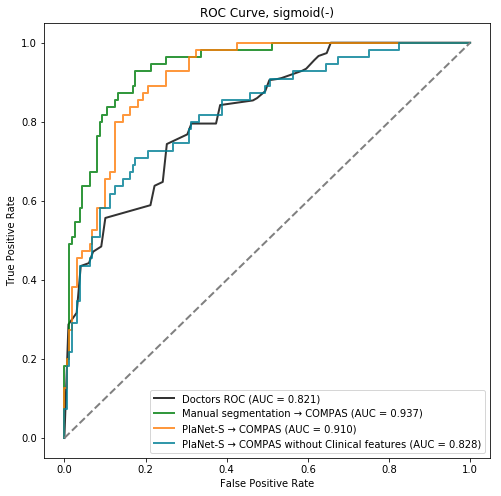

In [253]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.metrics import auc

#DOCTORs
# CSVファイルを読み込む
roc_df_doctors = pd.read_csv('mean_roc_curve.csv')
# mean_fpr と mean_tpr を抽出
fpr_doctors = roc_df_doctors['mean_fpr']
tpr_doctors = roc_df_doctors['mean_tpr']
auc_doctors = auc(fpr_doctors, tpr_doctors)

#AI
roc_AI1 = torch.load("Result/step7_2_check-PT-F1/ROC")
fpr_AI1 = roc_AI1[0].cpu()
tpr_AI1 = roc_AI1[1].cpu()
auc_AI1 = auc(fpr_AI1, tpr_AI1)

#AI
roc_AI2 = torch.load("Result/step7_2_check-PT-F1-cx/ROC")
fpr_AI2 = roc_AI2[0].cpu()
tpr_AI2 = roc_AI2[1].cpu()
auc_AI2 = auc(fpr_AI2, tpr_AI2)

#AI
roc_AI3 = torch.load("Result/step7_2_without/ROC")
fpr_AI3 = roc_AI3[0].cpu()
tpr_AI3 = roc_AI3[1].cpu()
auc_AI3 = auc(fpr_AI3, tpr_AI3)

# 平均ROCカーブを再描画
plt.figure(figsize=(8, 8))
plt.plot(fpr_doctors, tpr_doctors, color=[0/256, 0/256,0/256],
         label=r'Doctors ROC (AUC = %0.3f)' % (auc_doctors), lw=2, alpha=.8)
plt.plot(fpr_AI2, tpr_AI2, color=[0/256, 127/256,14/256],
         label=r'Manual segmentation → COMPAS (AUC = %0.3f)' % (auc_AI2), lw=2, alpha=.8)
plt.plot(fpr_AI1, tpr_AI1, color=[255/256, 127/256,14/256],
         label=r'PlaNet-S → COMPAS (AUC = %0.3f)' % (auc_AI1), lw=2, alpha=.8)
plt.plot(fpr_AI3, tpr_AI3, color=[0/256, 127/256,150/256],
         label=r'PlaNet-S → COMPAS without Clinical features (AUC = %0.3f)' % (auc_AI3), lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, sigmoid(-)')
plt.legend(loc="lower right")
plt.savefig("Result/step8/roc_20240128sigmoid-.png")
plt.show()

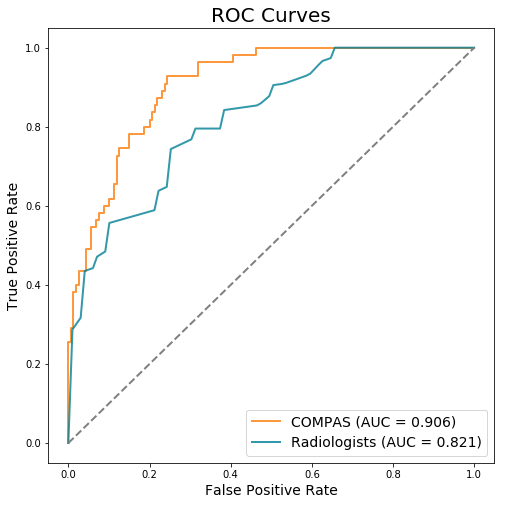

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.metrics import auc

#DOCTORs
# CSVファイルを読み込む
roc_df_doctors = pd.read_csv('mean_roc_curve.csv')
# mean_fpr と mean_tpr を抽出
fpr_doctors = roc_df_doctors['mean_fpr']
tpr_doctors = roc_df_doctors['mean_tpr']
auc_doctors = auc(fpr_doctors, tpr_doctors)

#AI
roc_AI1 = torch.load("Result/step7_2_check-PT-F1-sig/ROC")
fpr_AI1 = roc_AI1[0].cpu()
tpr_AI1 = roc_AI1[1].cpu()
auc_AI1 = auc(fpr_AI1, tpr_AI1)

#AI
# roc_AI2 = torch.load("Result/step7_2_check-PT-F1-sig-cx/ROC")
# fpr_AI2 = roc_AI2[0].cpu()
# tpr_AI2 = roc_AI2[1].cpu()
# auc_AI2 = auc(fpr_AI2, tpr_AI2)

#AI
# roc_AI3 = torch.load("Result/step7_2_sigwithout/ROC")
# fpr_AI3 = roc_AI3[0].cpu()
# tpr_AI3 = roc_AI3[1].cpu()
# auc_AI3 = auc(fpr_AI3, tpr_AI3)


fs = 20
fs2 = 14
# 平均ROCカーブを再描画
plt.figure(figsize=(8, 8))
# plt.plot(fpr_AI2, tpr_AI2, color=[0/256, 127/256,14/256],
#          label=r'Manual segmentation → COMPAS (AUC = %0.3f)' % (auc_AI2), lw=2, alpha=.8)
plt.plot(fpr_AI1, tpr_AI1, color=[255/256, 127/256,14/256],
         label=r'COMPAS (AUC = %0.3f)' % (auc_AI1), lw=2, alpha=.8)
# plt.plot(fpr_AI3, tpr_AI3, color=[0/256, 127/256,14/256],
#          label=r'COMPAS(-) (AUC = %0.3f)' % (auc_AI3), lw=2, alpha=.8)
plt.plot(fpr_doctors, tpr_doctors, color=[0/256, 127/256,150/256],
         label=r'Radiologists (AUC = %0.3f)' % (auc_doctors), lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=fs2)
plt.ylabel('True Positive Rate', fontsize=fs2)
plt.title('ROC Curves', fontsize=fs)
plt.legend(loc="lower right", fontsize=fs2)
plt.savefig("Result/step8/roc_20240206sigmoid+.png")
plt.show()

In [4]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

In [5]:
def bootstrap_auc_ci(y_true, y_pred, n_bootstraps=1000, ci=95):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)  # 再現性のための乱数シード
    
    for i in range(n_bootstraps):
        # ブートストラップサンプルを生成
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # クラスが1つしかないサンプルはスキップ
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    
    # 信頼区間の計算
    lower = np.percentile(sorted_scores, (100-ci)/2)
    upper = np.percentile(sorted_scores, 100-(100-ci)/2)
    return lower, upper


In [6]:
# 例: AIモデル1の信頼区間を計算
# y_true = 実際のラベルデータ
# y_pred_AI1 = AIモデル1からの予測スコア（確率）
lower_ci, upper_ci = bootstrap_auc_ci(y_true, y_pred_AI1)

print(f"AIモデル1のAUCの95%信頼区間: [{lower_ci:.3f}, {upper_ci:.3f}]")


NameError: name 'y_true' is not defined

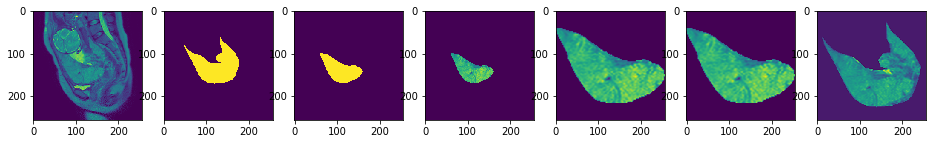

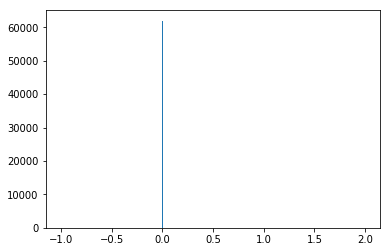

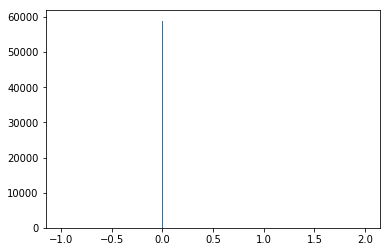

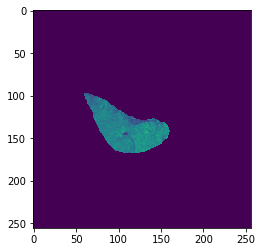

174.8133 226.68347
tensor(1) torch.int64 tensor(1) torch.float32 torch.int64


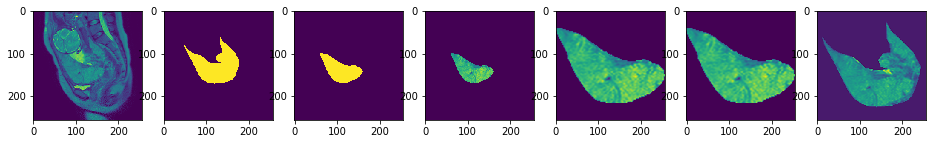

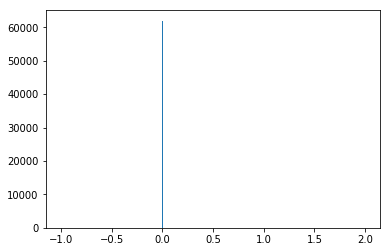

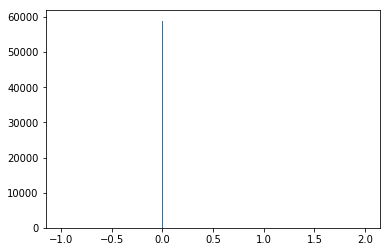

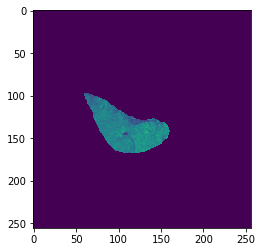

174.8133 226.68347
tensor(1) torch.int64 tensor(1) torch.float32 torch.int64


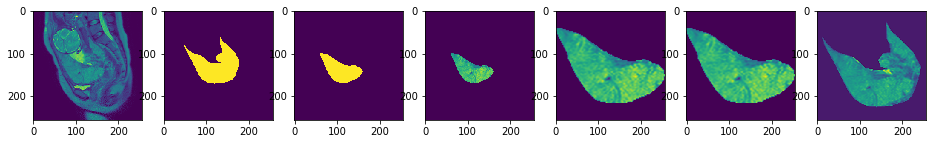

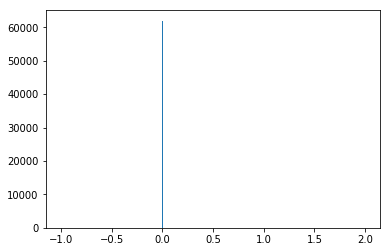

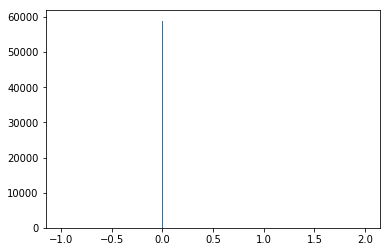

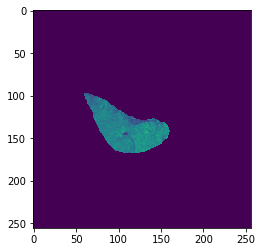

174.8133 226.68347
tensor(1) torch.int64 tensor(1) torch.float32 torch.int64


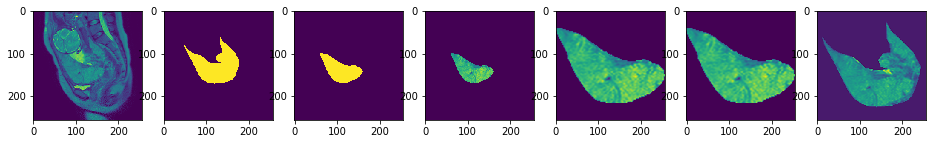

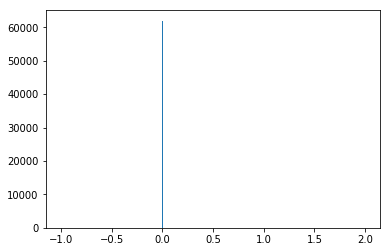

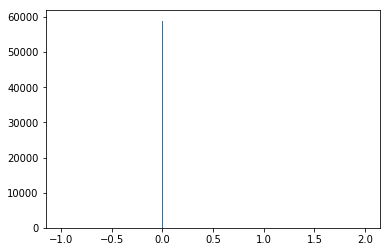

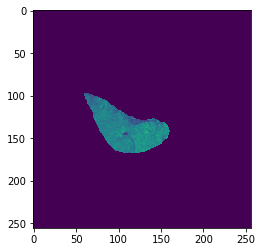

174.8133 226.68347
tensor(1) torch.int64 tensor(1) torch.float32 torch.int64


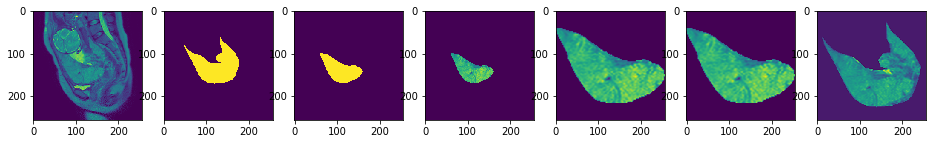

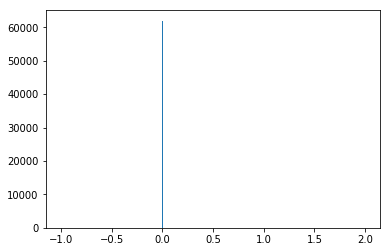

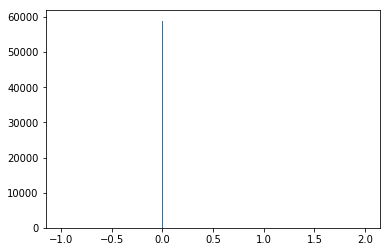

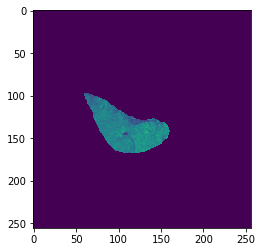

174.8133 226.68347
tensor(1) torch.int64 tensor(1) torch.float32 torch.int64


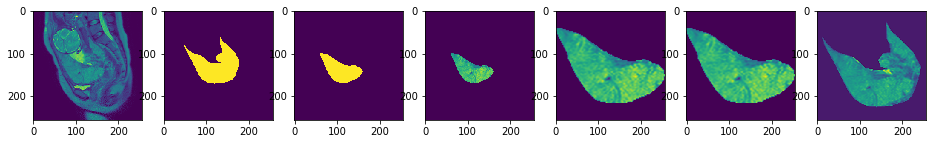

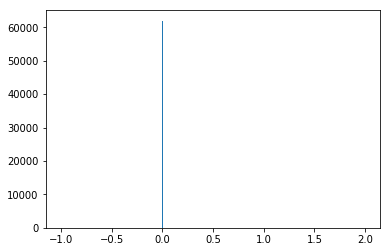

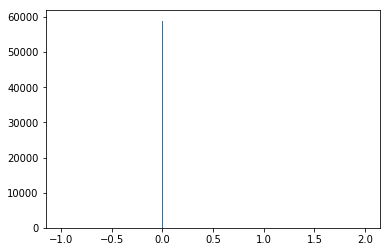

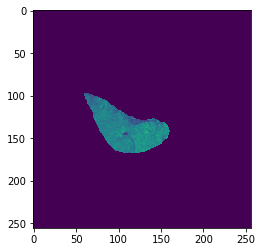

174.8133 226.68347
tensor(1) torch.int64 tensor(1) torch.float32 torch.int64


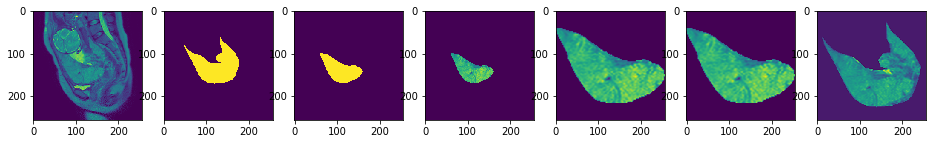

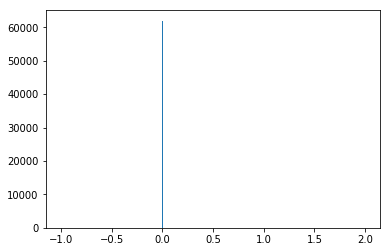

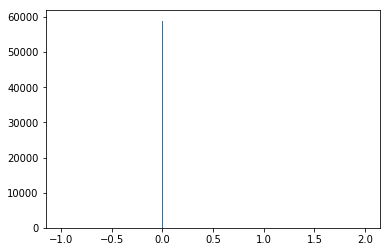

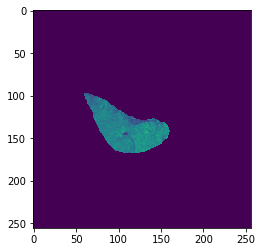

174.8133 226.68347
tensor(1) torch.int64 tensor(1) torch.float32 torch.int64


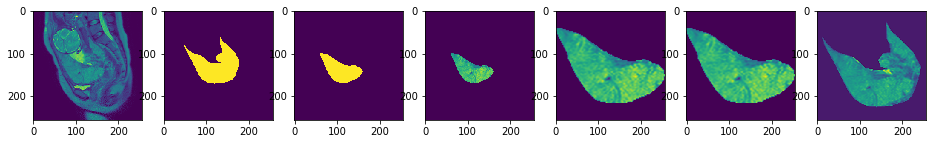

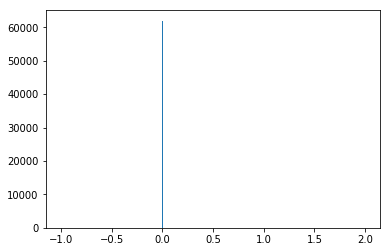

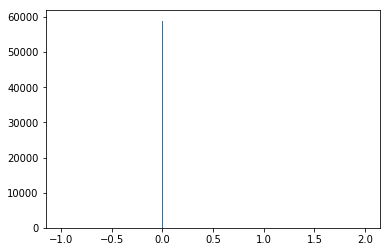

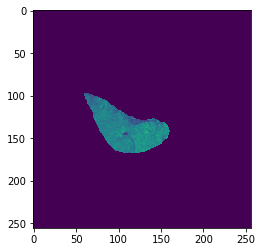

174.8133 226.68347
tensor(1) torch.int64 tensor(1) torch.float32 torch.int64


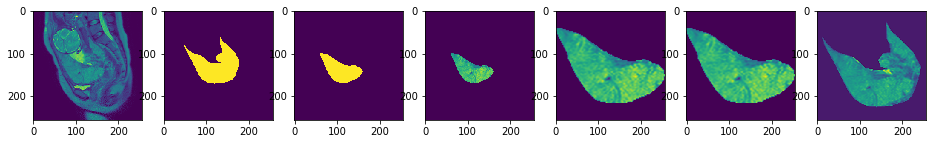

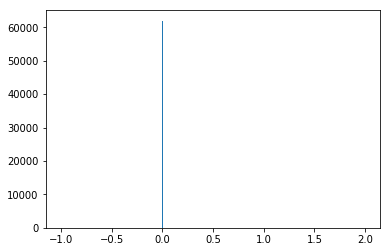

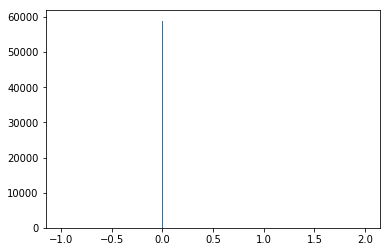

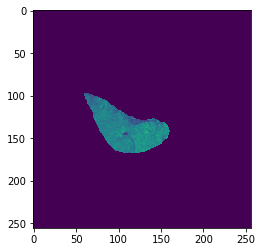

174.8133 226.68347
tensor(1) torch.int64 tensor(1) torch.float32 torch.int64


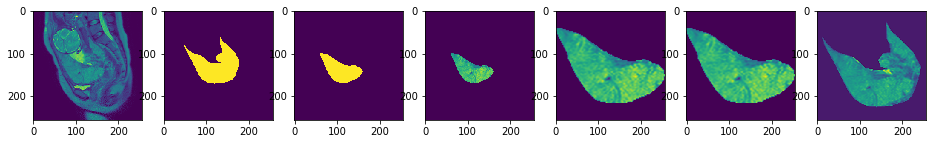

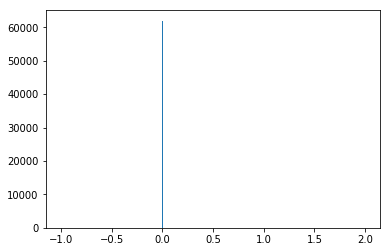

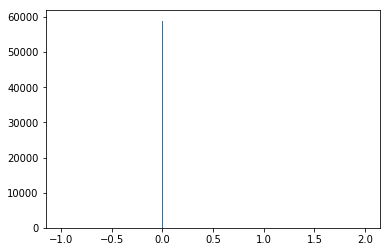

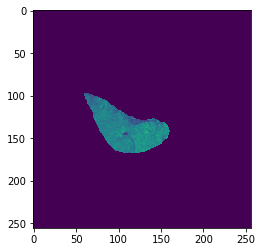

174.8133 226.68347
tensor(1) torch.int64 tensor(1) torch.float32 torch.int64


In [229]:
import numpy as np
for n in range(10):
    n = 4
    plt.figure(figsize=(16,8))
    x = torch.load('Result/step7_2_check/'+str(n)+"_r")  
    t_seg = torch.load('Result/step7_2_check/'+str(n)+"_t_seg")
    pred_seg = torch.load('Result/step7_2_check/'+str(n)+"_pred_seg")
    cimg = torch.load('Result/step7_2_check/'+str(n)+"_cimgs")
    cx = torch.load('Result/step7_2_check/'+str(n)+"_cx")
    af_mask = torch.load('Result/step7_2_check/'+str(n)+"_af_mask")  
    af_crop = torch.load('Result/step7_2_check/'+str(n)+"_af_crop") 
    af_crop = np.where(af_crop > 0.1, af_crop, torch.tensor(0.0))
    plt.subplot(1,7,1)
    plt.imshow(x.squeeze())
    plt.subplot(1,7,2)
    plt.imshow(t_seg.squeeze())
    plt.subplot(1,7,3)
    plt.imshow(pred_seg.squeeze())    
    plt.subplot(1,7,4)
    plt.imshow(af_mask.squeeze()) 
    plt.subplot(1,7,5)
    plt.imshow(af_crop.squeeze())   
    plt.subplot(1,7,6)
    plt.imshow(cimg.cpu().squeeze().detach().numpy())   
    plt.subplot(1,7,7)
    plt.imshow(cx.cpu().squeeze().detach().numpy())   
    plt.show()
    
    pred_seg_tensor = torch.from_numpy(pred_seg)
    pred_seg_float = pred_seg_tensor.type(torch.int64)
    pred_seg_float = pred_seg_float.unsqueeze(0)
    a = x * pred_seg_float
    b = x * t_seg
    plt.hist(a.ravel(), bins=256, range=[-1, 2])
    plt.show() 
    plt.hist(b.ravel(), bins=256, range=[-1, 2])
    plt.show() 
    
    plt.imshow(a.cpu().squeeze().detach().numpy(), vmin=0, vmax=255)   
    plt.show()     
    print(af_crop.max(), cx.cpu().squeeze().detach().numpy().max())
    print(t_seg.max(), t_seg.dtype, pred_seg_float.max(), x.dtype, pred_seg_float.dtype)

In [186]:
print(cx.max())
print(x.max())

tensor(123.7514)
tensor(242.4937)


In [133]:
print(cx.dtype)
print(x.dtype)

torch.float32
torch.float32


In [187]:
data = torch.load('Data_tensor_check/ft')
print(data[0][0].max())
print(data[0][0].max(), data[0][1].max(), data[0][2].max())

tensor(239.3931)
tensor(239.3931) tensor(111.8536) tensor(1)


In [193]:
x, cx, t_seg, t_cls, clinical_feature, ccc = data[0]

In [ ]:
afmask = x*

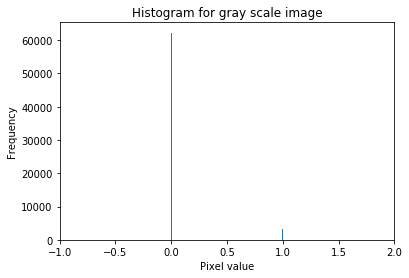

In [96]:
# 画像テンソルの例（ここにあなたの画像データを置きます）
image_tensor = t_seg

# 画像の形状に基づいて処理を変更
if len(image_tensor.shape) == 2:
    # グレースケール画像の場合
    plt.hist(image_tensor.ravel(), bins=256, range=[-1, 2])
    plt.title("Histogram for gray scale image")
elif len(image_tensor.shape) == 3:
    # カラー画像の場合 (RGB)
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = np.histogram(image_tensor[:, :, i], bins=256, range=[0, 1])
        plt.plot(hist[1][:-1], hist[0], color=color)
    plt.title("Histogram for RGB image")

plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.xlim([-1,2])
plt.show()

In [258]:
import torch.nn as nn
sigmoid =nn.Sigmoid()
ft = torch.load('Data_tensor/ft')

In [265]:
for n in range(len(ft)):
    print(ft[n][3])

tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
